# Project 7: Linear Regression 
## Author: Charlie Todd
### [GitHub Link](https://github.com/charlietodd11/datafun-07-ml)


In [120]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Part 1: Chart a Straight Line

### Define a varialbe c
Let c be degrees in Celcisus and it is a function of an input variable f, which stands for degrees in Fahrenheit. 

In [121]:
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0, 101, 10)] 

### Plot the function converting degrees Fahrenheit to degrees Celcisus

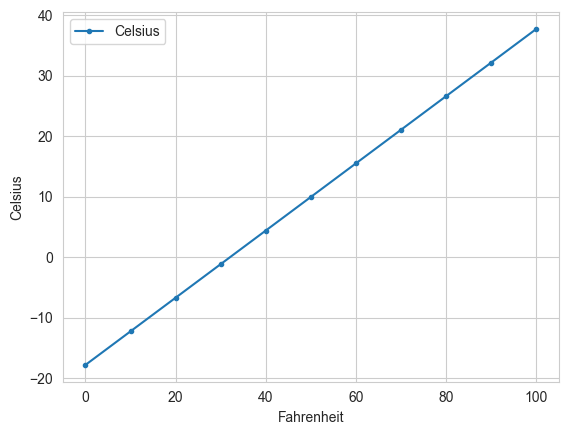

In [122]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

## Part 2: Predict Average High Temperatures in New York City in January


### Section 1 - Data Acquisition


In [123]:
nyc = pd.read_csv('data/avg_hi_ny.csv')


### Section 2 - Data Inspection

In [124]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [125]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [126]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [127]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [128]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 - Build the Model

### The following is the slope of the linear regression formula predicting temperature in degrees Fahrenheit in New York City

In [129]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope

0.014771361132966163

### The following is the y - coordinate of the y - intercept of the linear regression formula predicting temperature in degrees Fahrenheit in New York City

In [130]:
linear_regression.intercept

8.694993233674289

In [131]:
print(f'The linear regression equation is y = {linear_regression.slope}x + {linear_regression.intercept}.\nWhere y is the temperature in NY and x is the year')

The linear regression equation is y = 0.014771361132966163x + 8.694993233674289.
Where y is the temperature in NY and x is the year


### Section 6 - Predict

In [132]:
temp_2024 = linear_regression.slope*2024+linear_regression.intercept
print(f'The temperature in New York City in January 2024 is predicted to be {temp_2024}.')

The temperature in New York City in January 2024 is predicted to be 38.5922281667978.


### Section 7 - Visualizations

(10.0, 70.0)

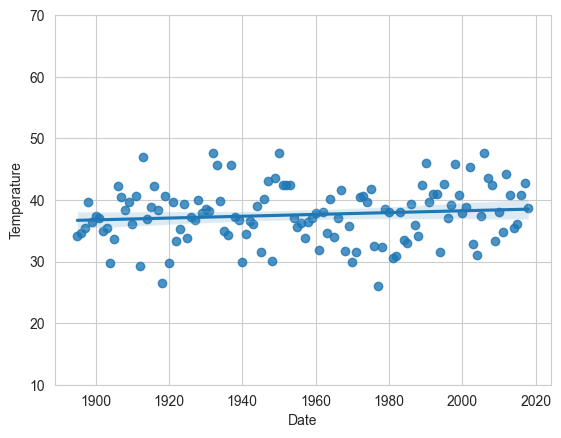

In [133]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10,70)

## Part 3: Predict Average High Temperatures in New York City in January

### Section 1 - Build the Model

In [134]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values,random_state = 11)
X_train.shape

(93, 1)

In [135]:
X_test.shape

(31, 1)

In [136]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

#### The following is the slope of the linear regression model:

In [137]:
m = linear_regression.coef_

#### The following is the y-coordinate of the y-intercept of the linear regression model:

In [138]:
b = linear_regression.intercept_

In [139]:
print(f'The linear regression equation is y = {m}x + {b}.') 

The linear regression equation is y = [0.01939167]x + -0.30779820252656265.


### Section 3 - Predict

In [140]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [141]:
#The expected temperature according to the model in the year 2024. 
predict = (lambda x: m * x + b)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

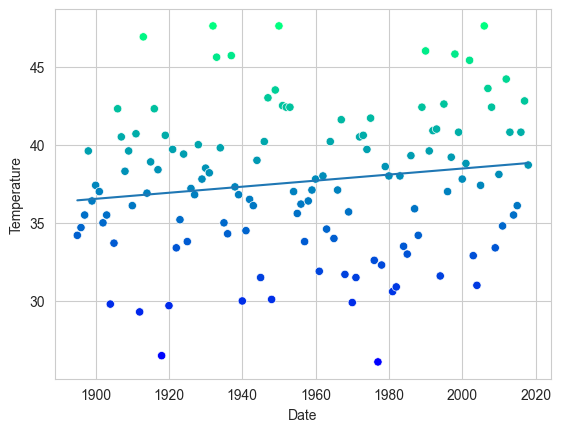

In [142]:
axes = sns.scatterplot(data=nyc, x ='Date', y='Temperature', hue='Temperature', palette = 'winter', legend =False)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)